##**Oasis Infobyte Data Science Internship - Task 2**
##**Name: Sachet Utekar**
###Task 2: Unemployment Analysis using python.

##**Importing necessary libraries & ignoring warnings(if any)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##**Reading the dataset**

In [2]:
df=pd.read_csv('/content/Unemployment in India.csv')

In [3]:
df.head() 

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.shape

(768, 7)

In [5]:
# checking for Null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
#dropping the null values
df=df.dropna()

In [7]:
#rechecking null values after dropping null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

##**Analyzing Data -**

In [8]:
df.shape

(740, 7)

In [9]:
#Statastically analyzing
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [11]:
#to print the columns
df.columns=['State','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate', 'Area']

In [12]:
# to print the state with highest unemployment
print("State with highest Unemployment:-",df['State'].value_counts().idxmax())

State with highest Unemployment:- Andhra Pradesh


In [13]:
# to print the state with lowest unemployment
print("State with Lowest Unemployment:-",df['State'].value_counts().idxmin())

State with Lowest Unemployment:- Chandigarh


In [14]:
#to print the month of unemployment

import datetime as dt
import calendar

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['month_int'] =  df['Date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [15]:
#to print the month with highest unemployment

print("Month with highest Unemployment:-",df['month'].value_counts().idxmax())

Month with highest Unemployment:- May


In [16]:
#to print the month with lowest unemployment

print("Month with lowest Unemployment:-",df['month'].value_counts().idxmin())

Month with lowest Unemployment:- Apr


In [17]:
df.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [18]:
#drop the unwanted columns
df.drop(columns=['Frequency','month_int'])

,State,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [19]:
#top 10 states with highest unemployment
df1=df[['State','Estimated Unemployment Rate']].groupby('State').sum().sort_values(by='Estimated Unemployment Rate',ascending=False)

In [20]:
df1.head(10) #top 10 states

,Estimated Unemployment Rate
State,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


##**Visualizing data -**

Text(0, 0.5, 'Number of people unemployed in %')

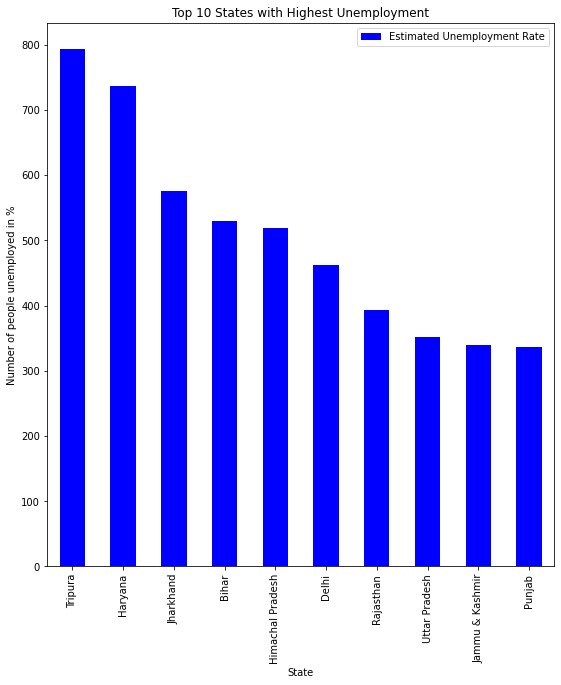

In [21]:
#visualization
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
df1[:10].plot(kind="bar",color="blue",figsize=(20,10),ax=ax0)
ax0.set_title("Top 10 States with Highest Unemployment")
ax0.set_xlabel("State")
ax0.set_ylabel("Number of people unemployed in %")

In [22]:
# months with highest unemployment
df2 = df[["month","Estimated Unemployment Rate"]].groupby("month").sum().sort_values(by="Estimated Unemployment Rate", ascending  =False)
df2.head(10)

,Estimated Unemployment Rate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


Text(0, 0.5, 'Number of People Unemployed (in %)')

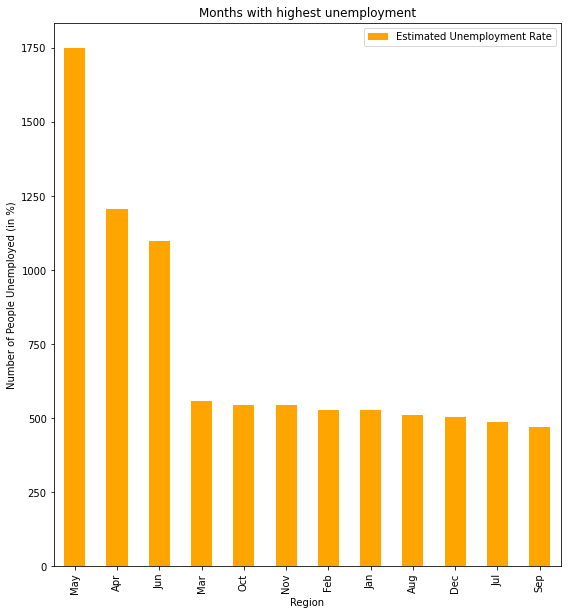

In [23]:
#visulaization
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
df2[:12].plot(kind="bar",color="orange",figsize=(20,10),ax=ax0)
ax0.set_title("Months with highest unemployment")
ax0.set_xlabel("Region")
ax0.set_ylabel("Number of People Unemployed (in %)")

In [24]:
# To visulize labour participation rate & unemployment rate in each month
IND =  df.groupby(["month"])[['Estimated Unemployment Rate', "Estimated Employed", "Estimated Labour Participation Rate"]].mean()
IND = pd.DataFrame(IND).reset_index()
month = IND.month
unemployment_rate = IND["Estimated Unemployment Rate"]
labour_participation_rate = IND["Estimated Labour Participation Rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()

Text(0, 0.5, 'Number of People Unemployed (in %)')

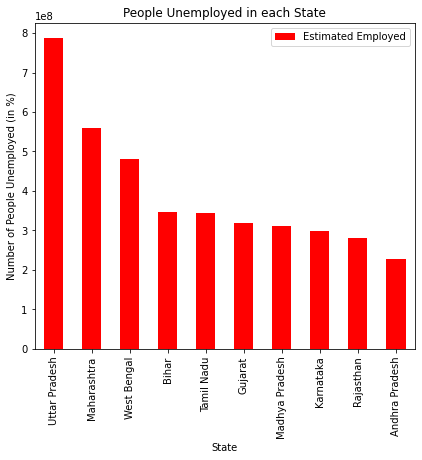

In [25]:
# State wise rate of unemployement

df1 = df[["State","Estimated Employed"]].groupby("State").sum().sort_values(by="Estimated Employed", ascending =False)
df1.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

df1[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Unemployed in each State")
ax0.set_xlabel("State")
ax0.set_ylabel("Number of People Unemployed (in %)")

Text(0, 0.5, 'Number of People Unemployed (in %)')

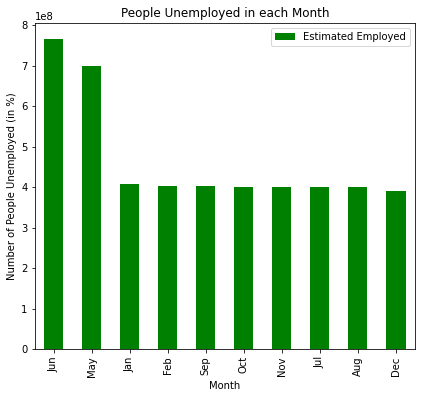

In [26]:
# Month wise rate of unemployement
df2 = df[["month","Estimated Employed"]].groupby("month").sum().sort_values(by="Estimated Employed", ascending =False)
df2.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

df2[:10].plot(kind="bar",color="green",figsize=(15,6),ax=ax0)
ax0.set_title("People Unemployed in each Month")
ax0.set_xlabel("Month")
ax0.set_ylabel("Number of People Unemployed (in %)")

In [27]:
# bar plot unemployment rate (monthly)

fig = px.bar(df, x='State',y='Estimated Unemployment Rate', animation_frame = 'month', color='State',
            title='Unemployment rate (State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.show()

##**CONCLUSION:**


### 1. State with highest Unemployment:- Andhra Pradesh
### 2. State with Lowest Unemployment:- Chandigarh
### 3. Month with highest Unemployment:- May
### 4. Month with lowest Unemployment:- April
### 5. Graph Progress: Higher The labour participation Lower the unemployment rate